In [59]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create an empty graph
G = nx.Graph()

# Read the edges from the file and add them to the graph
with open("Yeast.txt", "r") as file:
    for line in file:
        if not line.startswith("%"):  # Ignore comment lines
            source, target = map(int, line.strip().split())
            G.add_edge(source, target)

# Number of nodes
num_nodes = G.number_of_nodes()

# Number of edges
num_edges = G.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)


Number of nodes: 1870
Number of edges: 2277


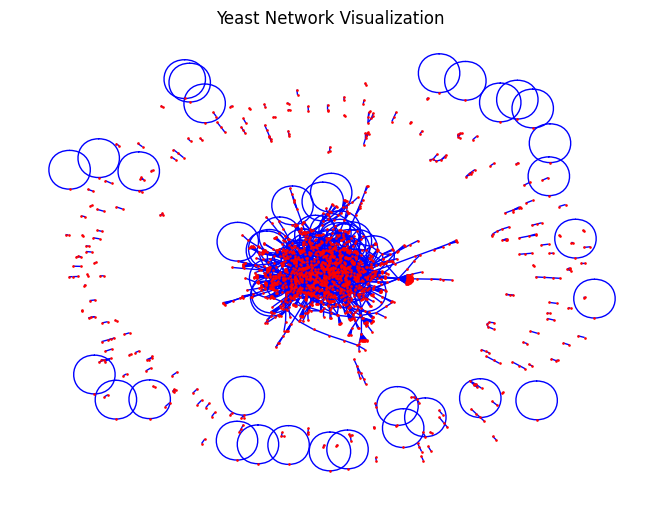

In [60]:
pos = nx.spring_layout(G)

# Draw the nodes and edges with specified sizes and colors
nx.draw(G, pos=pos, node_size=0.8, node_color='r', edge_color='b', width=1)

# Set plot title
plt.title('Yeast Network Visualization')

# Show the plot
plt.show()


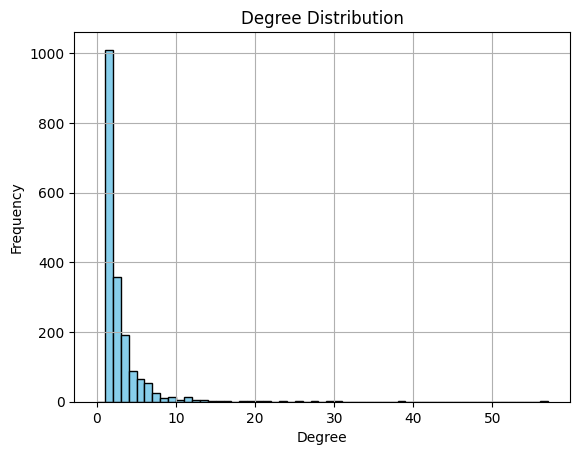

In [61]:
# Get the degree of each node
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Plot the degree distribution
plt.hist(degree_sequence, bins=range(max(degree_sequence) + 2), color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.grid(True)
plt.show()

In [62]:
# Calculate degrees of all nodes
degrees = dict(G.degree())

# Sort nodes by degree in descending order 
top_10_nodes = sorted(degrees, key=degrees.get, reverse=True)[:10]

# Create a DataFrame
df = pd.DataFrame({
    'Node': top_10_nodes,
    'Degree': [degrees[node] for node in top_10_nodes]
})

print(df)

   Node  Degree
0   181      56
1    26      38
2    58      30
3    78      29
4    60      29
5   124      27
6    16      25
7   270      23
8    19      21
9    79      21


In [63]:
# Get the degree of each node
degrees = [d for n, d in G.degree()]

# Calculate maximum degree
max_degree = max(degrees)

# Calculate minimum degree
min_degree = min(degrees)

# Calculate average degree
avg_degree = sum(degrees) / len(degrees)

# Calculate standard deviation of the degree distribution
std_dev_degree = np.std(degrees)

print("Maximum Degree:", max_degree)
print("Minimum Degree:", min_degree)
print("Average Degree:", avg_degree)
print("Standard Deviation of Degree Distribution:", std_dev_degree)

Maximum Degree: 56
Minimum Degree: 1
Average Degree: 2.4352941176470586
Standard Deviation of Degree Distribution: 3.1637714064744453


In [64]:
# Calculate average local clustering coefficient
avg_local_clustering_coefficient = nx.average_clustering(G)

# Calculate global clustering coefficient
global_clustering_coefficient = nx.transitivity(G)

# Calculate transitivity
transitivity = nx.transitivity(G)
print("transitivity",transitivity)

# Calculate reciprocity
reciprocity_value = nx.reciprocity(G)
print("Reciprocity:", reciprocity_value)


print("avg_local_clustering_coefficient",avg_local_clustering_coefficient)
print("global_clustering_coefficient",global_clustering_coefficient)



transitivity 0.055009498637152064
Reciprocity: 0.0
avg_local_clustering_coefficient 0.06716802014455511
global_clustering_coefficient 0.055009498637152064


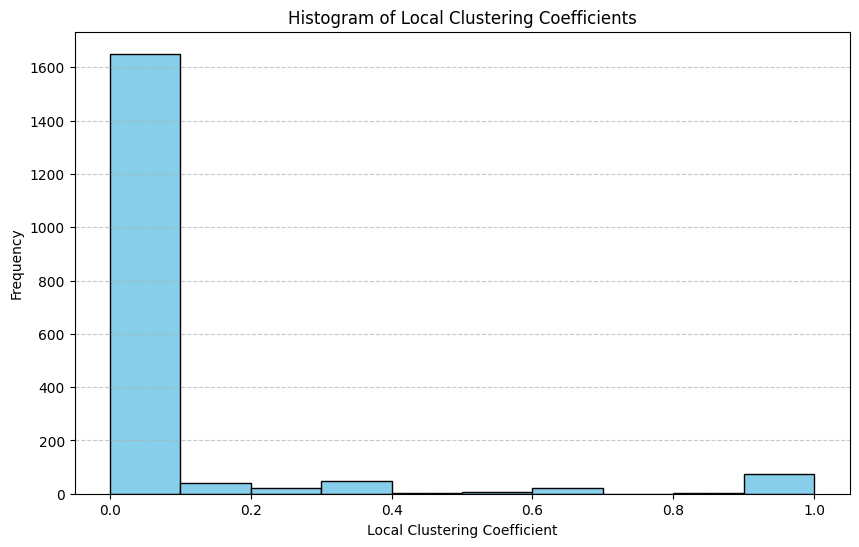

In [65]:
# Calculate local clustering coefficients for each node

local_clustering_coefficients = nx.clustering(G)
# Create DataFrame to store nodes and their local clustering coefficients
local_clustering_df = pd.DataFrame({
    'Node': list(local_clustering_coefficients.keys()),
    'Local Clustering Coefficient': list(local_clustering_coefficients.values())
})

# Sort the DataFrame by node for plotting
local_clustering_df = local_clustering_df.sort_values(by='Node')
# Plot
plt.figure(figsize=(10, 6))
plt.hist(local_clustering_df['Local Clustering Coefficient'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Histogram of Local Clustering Coefficients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [66]:
sorted_nodes = sorted(local_clustering_coefficients.items(), key=lambda x: x[1], reverse=True)

# Select top 10 nodes with highest clustering coefficients
top_10_nodes = sorted_nodes[:10]

# Print the top 10 nodes with their clustering coefficients
for node, coefficient in top_10_nodes:
    print("Node:", node, " - Local Clustering Coefficient:", coefficient)

Node: 10  - Local Clustering Coefficient: 1.0
Node: 11  - Local Clustering Coefficient: 1.0
Node: 338  - Local Clustering Coefficient: 1.0
Node: 779  - Local Clustering Coefficient: 1.0
Node: 23  - Local Clustering Coefficient: 1.0
Node: 354  - Local Clustering Coefficient: 1.0
Node: 647  - Local Clustering Coefficient: 1.0
Node: 44  - Local Clustering Coefficient: 1.0
Node: 278  - Local Clustering Coefficient: 1.0
Node: 280  - Local Clustering Coefficient: 1.0


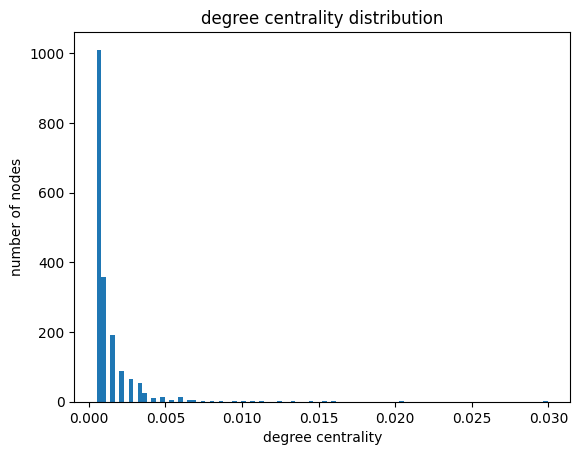

In [67]:
degree_centrality = nx.degree_centrality(G)
plt.hist(list(degree_centrality.values()),bins= 100)
plt.title("degree centrality distribution")
plt.xlabel("degree centrality")
plt.ylabel("number of nodes")
plt.show()
centrality_df = pd.DataFrame({'Degree Centrality': degree_centrality,})


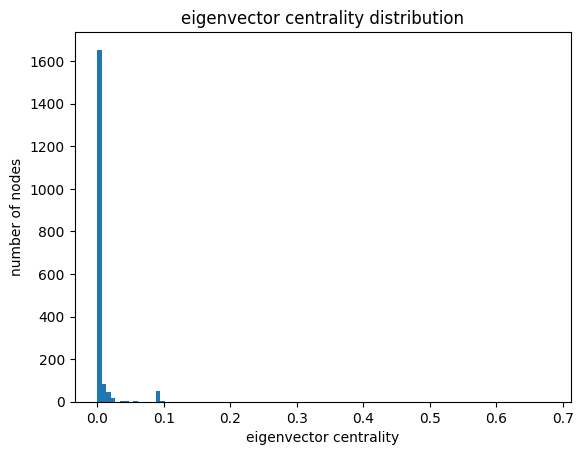

In [68]:
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=500, tol=1e-6)
plt.hist(list(eigenvector_centrality.values()),bins= 100)
plt.title("eigenvector centrality distribution")
plt.xlabel("eigenvector centrality")
plt.ylabel("number of nodes")
plt.show()

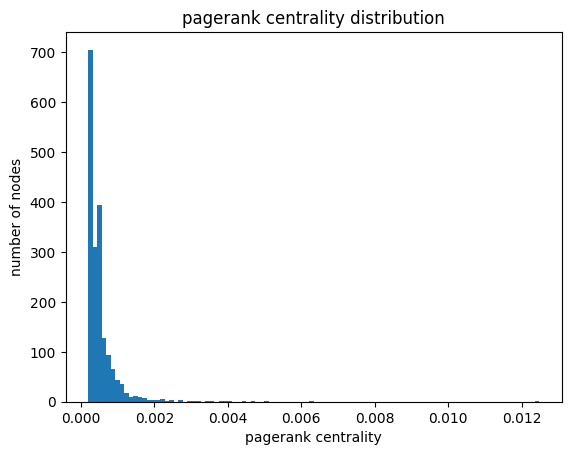

In [69]:
pagerank_centrality = nx.pagerank(G)
plt.hist(list(pagerank_centrality.values()),bins= 100)
plt.title("pagerank centrality distribution")
plt.xlabel("pagerank centrality")
plt.ylabel("number of nodes")
plt.show()

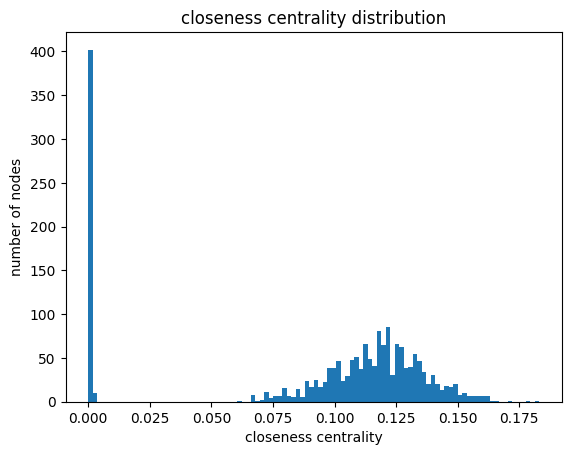

In [70]:
try: 
    closeness_centrality = nx.closeness_centrality(G)
    plt.hist(list(closeness_centrality.values()),bins= 100)
    plt.title("closeness centrality distribution")
    plt.xlabel("closeness centrality")
    plt.ylabel("number of nodes")
    plt.show()
except nx.NetworkXError as e:
    print("closeness_centrality calculation failed:", e)


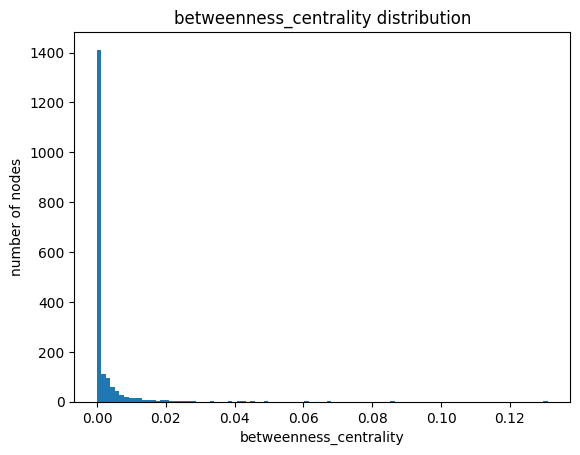

In [71]:
try: 
    betweenness_centrality = nx.betweenness_centrality(G, k=1000)
    plt.hist(list(betweenness_centrality.values()),bins= 100)
    plt.title("betweenness_centrality distribution")
    plt.xlabel("betweenness_centrality")
    plt.ylabel("number of nodes")
    plt.show()
except nx.NetworkXError as e:
    print("betweenness_centrality calculation failed:", e)

In [72]:
degree_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['Degree Centrality'])
betweenness_df = pd.DataFrame.from_dict(betweenness_centrality, orient='index', columns=['Betweenness Centrality'])
closeness_df = pd.DataFrame.from_dict(closeness_centrality, orient='index', columns=['Closeness Centrality'])
eigenvector_df = pd.DataFrame.from_dict(eigenvector_centrality, orient='index', columns=['Eigenvector Centrality'])

# Sort DataFrames by centrality values
degree_df = degree_df.sort_values(by='Degree Centrality', ascending=False)
betweenness_df = betweenness_df.sort_values(by='Betweenness Centrality', ascending=False)
closeness_df = closeness_df.sort_values(by='Closeness Centrality', ascending=False)
eigenvector_df = eigenvector_df.sort_values(by='Eigenvector Centrality', ascending=False)

# Get top 10 nodes for each centrality measure
top_10_degree = degree_df.head(10)
top_10_betweenness = betweenness_df.head(10)
top_10_closeness = closeness_df.head(10)
top_10_eigenvector = eigenvector_df.head(10)


In [73]:
print("Top 10 Nodes by Degree Centrality:")
print(top_10_degree)
print("\nTop 10 Nodes by Betweenness Centrality:")
print(top_10_betweenness)

Top 10 Nodes by Degree Centrality:
     Degree Centrality
181           0.029963
26            0.020332
58            0.016051
78            0.015516
60            0.015516
124           0.014446
16            0.013376
270           0.012306
368           0.011236
79            0.011236

Top 10 Nodes by Betweenness Centrality:
     Betweenness Centrality
26                 0.130999
78                 0.085347
58                 0.067661
181                0.060648
3                  0.048992
270                0.045818
60                 0.043227
79                 0.041147
592                0.039217
124                0.038886


In [74]:
print("\nTop 10 Nodes by Closeness Centrality:")
print(top_10_closeness)
print("\nTop 10 Nodes by Eigenvector Centrality:")
print(top_10_eigenvector)


Top 10 Nodes by Closeness Centrality:
      Closeness Centrality
26                0.183020
78                0.178841
58                0.170749
77                0.165306
686               0.163075
374               0.162632
400               0.162515
969               0.162214
1353              0.162191
60                0.161867

Top 10 Nodes by Eigenvector Centrality:
     Eigenvector Centrality
181                0.677514
592                0.120746
26                 0.109327
604                0.106495
268                0.098122
291                0.096882
608                0.095392
602                0.093281
598                0.091581
610                0.091506


project Round 2

In [75]:
# Create an empty graph
OpenFlights = nx.Graph()

# Read the edges from the file and add them to the graph
with open("OpenFlights.txt", "r") as file:
    for line in file:
        if not line.startswith("%"):  # Ignore comment lines
            source, target = map(int, line.strip().split())
            OpenFlights.add_edge(source, target)

# Number of nodes
num_nodes = OpenFlights.number_of_nodes()

# Number of edges
num_edges = OpenFlights.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 3425
Number of edges: 19257


In [76]:
# Create an empty graph
Yeast = nx.Graph()

# Read the edges from the file and add them to the graph
with open("Yeast.txt", "r") as file:
    for line in file:
        if not line.startswith("%"):  # Ignore comment lines
            source, target = map(int, line.strip().split())
            Yeast.add_edge(source, target)

# Number of nodes
num_nodes = Yeast.number_of_nodes()

# Number of edges
num_edges = Yeast.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 1870
Number of edges: 2277


In [77]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def barabasi_albert_graph(n, m):
    # Initialize a graph with m nodes
    G = nx.Graph()
    G.add_node(0)

    # Attach each new node to m existing nodes
    for i in range(1, n):
        nodes_to_connect = np.random.choice(list(G.nodes), size=min(m, i), replace=False)
        for node in nodes_to_connect:
            G.add_edge(i, node)

    return G

# Generate a BA network with 10,000 nodes and m=10
S = barabasi_albert_graph(10000, 10)

num_nodes = S.number_of_nodes()

# Number of edges
num_edges = S.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)




Number of nodes: 10000
Number of edges: 99945


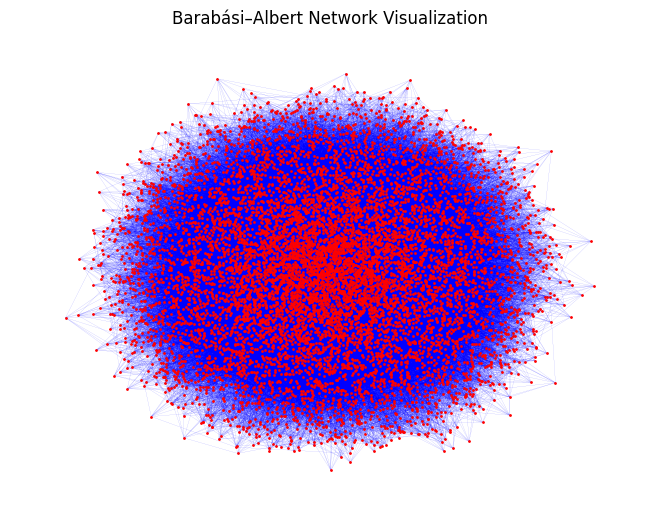

In [78]:
pos = nx.spring_layout(S)

# Draw the nodes and edges with specified sizes and colors
nx.draw(S, pos=pos, node_size=1, node_color='r', edge_color='b', width=0.05)

# Set plot title
plt.title('Barabási–Albert Network Visualization')

# Show the plot
plt.show()

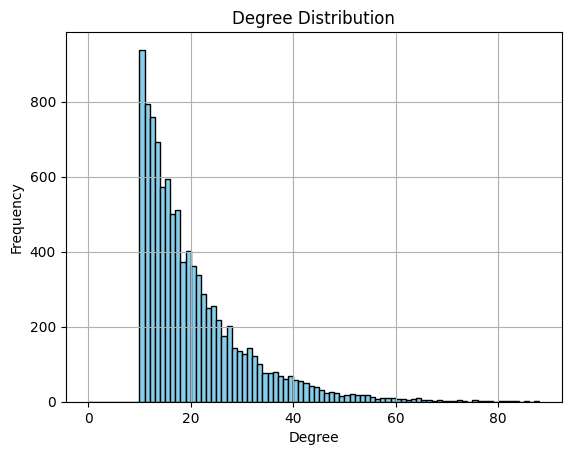

In [79]:
# Get the degree of each node
degree_sequence = sorted([d for n, d in S.degree()], reverse=True)

# Plot the degree distribution
plt.hist(degree_sequence, bins=range(max(degree_sequence) + 2), color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.grid(True)
plt.show()

In [80]:
# Calculate degrees of all nodes
degrees = dict(S.degree())

# Sort nodes by degree in descending order
top_10_nodes = sorted(degrees, key=degrees.get, reverse=True)[:10]

# Create a DataFrame
df = pd.DataFrame({
    'Node': top_10_nodes,
    'Degree': [degrees[node] for node in top_10_nodes]
})

print(df)

   Node  Degree
0     6      87
1     3      85
2    12      85
3     0      83
4    25      83
5    40      83
6     4      82
7     8      82
8    10      82
9     9      81


In [81]:
# Get the degree of each node
degrees = [d for n, d in S.degree()]

# Calculate maximum degree
max_degree = max(degrees)

# Calculate minimum degree
min_degree = min(degrees)

# Calculate average degree
avg_degree = sum(degrees) / len(degrees)

# Calculate standard deviation of the degree distribution
std_dev_degree = np.std(degrees)

print("Maximum Degree:", max_degree)
print("Minimum Degree:", min_degree)
print("Average Degree:", avg_degree)
print("Standard Deviation of Degree Distribution:", std_dev_degree)

Maximum Degree: 87
Minimum Degree: 10
Average Degree: 19.989
Standard Deviation of Degree Distribution: 10.408961475574783


In [82]:
# Calculate average local clustering coefficient
avg_local_clustering_coefficient = nx.average_clustering(S)

# Calculate global clustering coefficient
global_clustering_coefficient = nx.transitivity(S)

# Calculate transitivity
transitivity = nx.transitivity(S)
print("transitivity",transitivity)

# Calculate reciprocity
reciprocity_value = nx.reciprocity(S)
print("Reciprocity:", reciprocity_value)


print("avg_local_clustering_coefficient",avg_local_clustering_coefficient)
print("global_clustering_coefficient",global_clustering_coefficient)

transitivity 0.0074041190561685
Reciprocity: 0.0
avg_local_clustering_coefficient 0.0031761617592800826
global_clustering_coefficient 0.0074041190561685


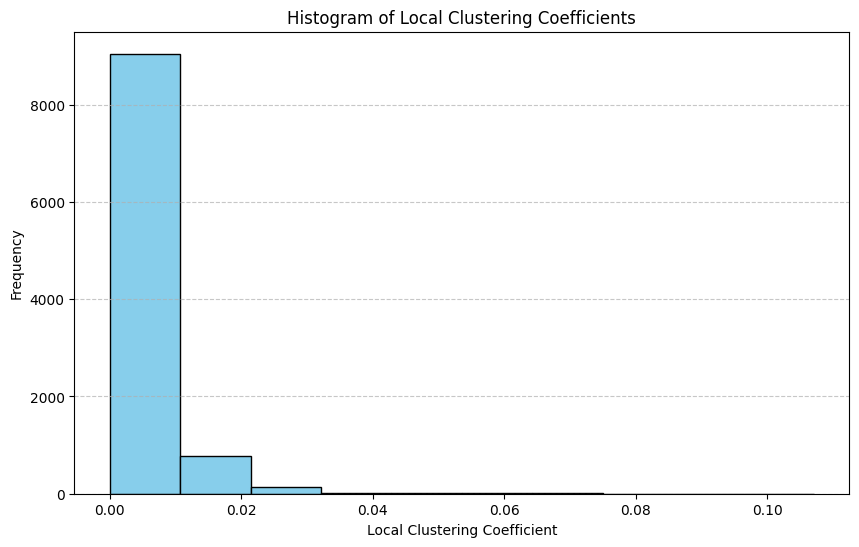

In [83]:
# Calculate local clustering coefficients for each node

local_clustering_coefficients = nx.clustering(S)
# Create DataFrame to store nodes and their local clustering coefficients
local_clustering_df = pd.DataFrame({
    'Node': list(local_clustering_coefficients.keys()),
    'Local Clustering Coefficient': list(local_clustering_coefficients.values())
})

# Sort the DataFrame by node for plotting
local_clustering_df = local_clustering_df.sort_values(by='Node')
# Plot
plt.figure(figsize=(10, 6))
plt.hist(local_clustering_df['Local Clustering Coefficient'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Histogram of Local Clustering Coefficients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [84]:
sorted_nodes = sorted(local_clustering_coefficients.items(), key=lambda x: x[1], reverse=True)

# Select top 10 nodes with highest clustering coefficients
top_10_nodes = sorted_nodes[:10]

# Print the top 10 nodes with their clustering coefficients
for node, coefficient in top_10_nodes:
    print("Node:", node, " - Local Clustering Coefficient:", coefficient)

Node: 5  - Local Clustering Coefficient: 0.10710382513661203
Node: 0  - Local Clustering Coefficient: 0.08551278283867177
Node: 9  - Local Clustering Coefficient: 0.0824074074074074
Node: 13  - Local Clustering Coefficient: 0.07711711711711712
Node: 8  - Local Clustering Coefficient: 0.07557964468533575
Node: 2  - Local Clustering Coefficient: 0.0730593607305936
Node: 1  - Local Clustering Coefficient: 0.07151898734177216
Node: 10  - Local Clustering Coefficient: 0.0698584763625414
Node: 15  - Local Clustering Coefficient: 0.06881287726358148
Node: 7  - Local Clustering Coefficient: 0.06738738738738739


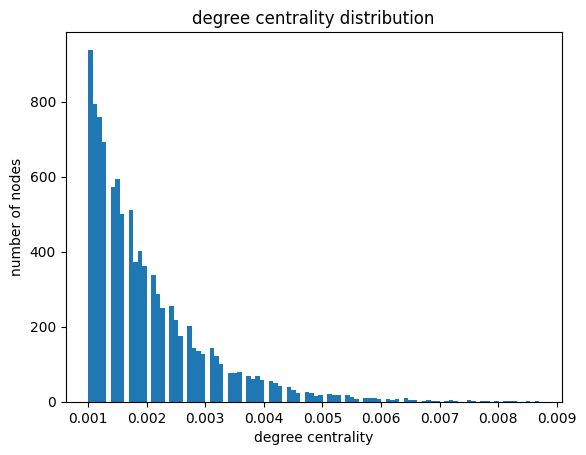

In [85]:
degree_centrality = nx.degree_centrality(S)
plt.hist(list(degree_centrality.values()),bins= 100)
plt.title("degree centrality distribution")
plt.xlabel("degree centrality")
plt.ylabel("number of nodes")
plt.show()
centrality_df = pd.DataFrame({'Degree Centrality': degree_centrality,})

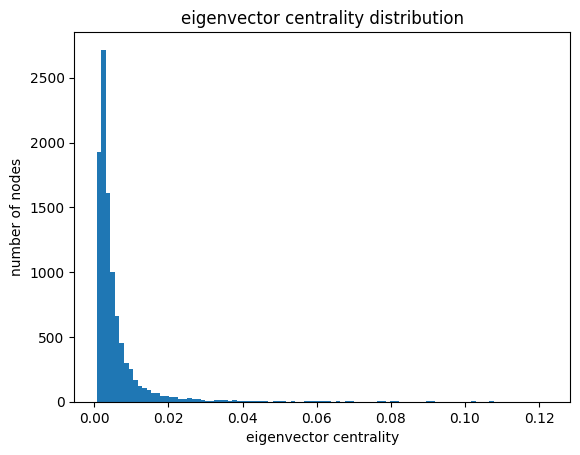

In [86]:
eigenvector_centrality = nx.eigenvector_centrality(S)
plt.hist(list(eigenvector_centrality.values()),bins= 100)
plt.title("eigenvector centrality distribution")
plt.xlabel("eigenvector centrality")
plt.ylabel("number of nodes")
plt.show()

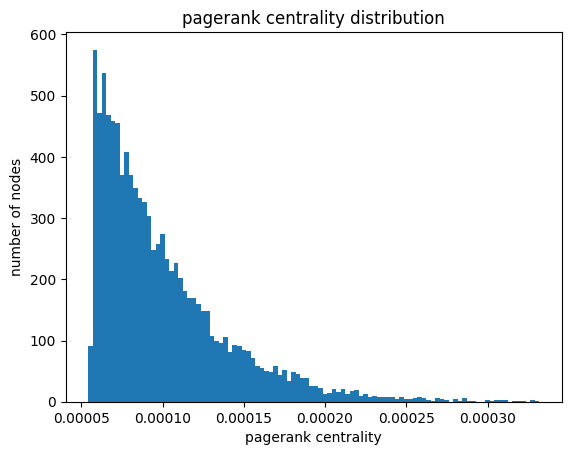

In [87]:
pagerank_centrality = nx.pagerank(S)
plt.hist(list(pagerank_centrality.values()),bins= 100)
plt.title("pagerank centrality distribution")
plt.xlabel("pagerank centrality")
plt.ylabel("number of nodes")
plt.show()

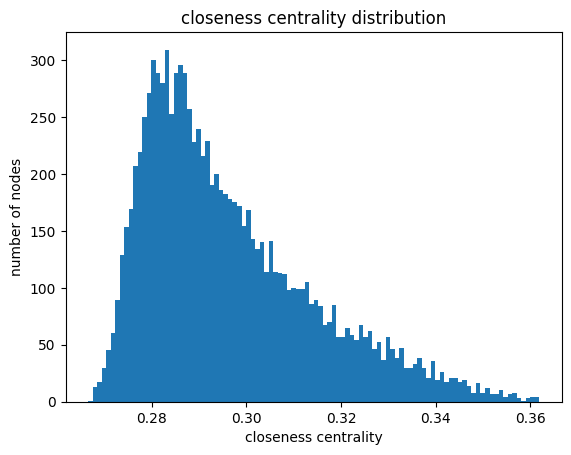

In [88]:
try:
    closeness_centrality = nx.closeness_centrality(S)
    plt.hist(list(closeness_centrality.values()),bins= 100)
    plt.title("closeness centrality distribution")
    plt.xlabel("closeness centrality")
    plt.ylabel("number of nodes")
    plt.show()
except nx.NetworkXError as e:
    print("closeness_centrality calculation failed:", e)

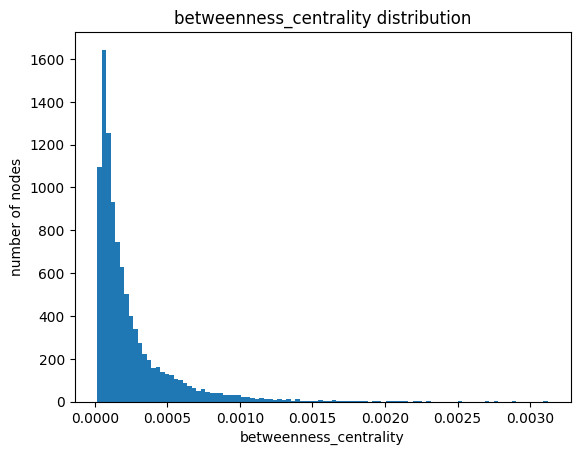

In [89]:
try:
    betweenness_centrality = nx.betweenness_centrality(S, k=1000)
    plt.hist(list(betweenness_centrality.values()),bins= 100)
    plt.title("betweenness_centrality distribution")
    plt.xlabel("betweenness_centrality")
    plt.ylabel("number of nodes")
    plt.show()
except nx.NetworkXError as e:
    print("betweenness_centrality calculation failed:", e)

In [90]:

def find_giant_component(graph):
    connected_components = list(nx.connected_components(graph))
    giant_component = max(connected_components, key=len)
    return giant_component

# for network S(ba-network)
giant_component_for_S = find_giant_component(S)
# for Yeast dataset from previous round 1
giant_component2 = find_giant_component(Yeast)
# # for OpenFlights dataset from previous round 1
giant_component3 = find_giant_component(OpenFlights)

# Calculate the sizes of the giant components
size1 = len(giant_component_for_S)
size2 = len(giant_component2)
size3 = len(giant_component3)
print("giant component size in network s:",size1)
print("giant component size in Yeast network :",size2)
print("giant component size in OpenFlights network s:",size3)

giant component size in network s: 10000
giant component size in Yeast network : 1458
giant component size in OpenFlights network s: 3397


In [91]:
import random


# Define the function to generate random activation probabilities
def generate_activation_probabilities(network):
    activation_probabilities = {}
    for node in network.nodes():
        # Get outgoing edges for the current node
        outgoing_edges = list(network.edges(node))
        num_outgoing_edges = len(outgoing_edges)

        # Generate random probabilities
        probabilities = [random.uniform(0, 1) for _ in range(num_outgoing_edges)]

        # Normalize probabilities so that they sum up to 1
        total_prob = sum(probabilities)
        probabilities = [p / total_prob for p in probabilities]

        # Assign probabilities to edges
        for i, (v, w) in enumerate(outgoing_edges):
            activation_probabilities[(v, w)] = probabilities[i]

    return activation_probabilities

# Define the function to apply Independent Cascade Model (ICM) to the network
def icm(network, starting_node, activation_probabilities):
    active_nodes = set([starting_node])
    new_nodes = set([starting_node])

    steps = 0
    while new_nodes:
        steps += 1
        current_nodes = new_nodes.copy()
        new_nodes = set()

        for node in current_nodes:
            neighbors = set(network.neighbors(node)) - active_nodes
            for neighbor in neighbors:
                if random.random() < activation_probabilities[(node, neighbor)]:
                    new_nodes.add(neighbor)
                    active_nodes.add(neighbor)

    return steps

# Define the function to calculate the average number of steps over 10 repetitions
def average_steps(network, activation_probabilities):
    total_steps = 0
    num_repetitions = 10

    for _ in range(num_repetitions):
        starting_node = random.choice(list(network.nodes()))
        print("starting nodes",starting_node)
        icmValue= icm(network, starting_node, activation_probabilities)
        total_steps += icmValue
        print(icmValue)

    return total_steps / num_repetitions

# Generate random activation probabilities satisfying the constraint
activation_probabilities = generate_activation_probabilities(G)

# Calculate the average number of steps
avg_steps = average_steps(G, activation_probabilities)
print(f"Average number of steps for the network: {avg_steps}")


starting nodes 1833
2
starting nodes 499
3
starting nodes 1195
3
starting nodes 1584
2
starting nodes 1182
2
starting nodes 71
1
starting nodes 1312
2
starting nodes 1045
5
starting nodes 1560
6
starting nodes 1034
2
Average number of steps for the network: 2.8


In [92]:
activation_probabilities

{(1, 2): 0.24074527960971284,
 (1, 3): 0.3085616004668049,
 (1, 4): 0.1330987910140289,
 (1, 5): 0.3083776060790339,
 (1, 6): 0.009216722830419405,
 (2, 1): 0.3308787598881865,
 (2, 113): 0.029315631896832162,
 (2, 114): 0.2879700156622899,
 (2, 115): 0.004569126733739985,
 (2, 116): 0.1949150275757246,
 (2, 117): 0.15235143824322675,
 (3, 1): 0.048750690578238554,
 (3, 14): 0.07790105602871668,
 (3, 139): 0.03634372136856825,
 (3, 255): 0.006237820623866725,
 (3, 283): 0.07523953760645838,
 (3, 319): 0.07975731350892339,
 (3, 487): 0.05314907342173245,
 (3, 530): 0.027955003350447524,
 (3, 642): 0.06264391350393297,
 (3, 816): 0.08312843019018963,
 (3, 823): 0.06384441213507294,
 (3, 1031): 0.08446397129726814,
 (3, 1082): 0.06526778056633437,
 (3, 1374): 0.015404835945347648,
 (3, 1406): 0.028074177539785576,
 (3, 1425): 0.07184612264366921,
 (3, 1435): 0.03889371544124566,
 (3, 1436): 0.02862401785215502,
 (3, 1437): 0.008799198887143332,
 (3, 1438): 0.04367520751090336,
 (4, 1): 0.